# 数据处理

In [5]:
import pandas as pd


def preprocess_beth_data(input_filepath: str, output_filepath: str) -> pd.DataFrame:
    """
    根据 BETH 论文附录A中的描述预处理网络安全日志数据。

    Args:
        input_filepath (str): 包含原始数据的CSV文件路径。
        output_filepath (str): 保存处理后数据的CSV文件路径。
    """
    try:
        # 1. 加载数据
        df = pd.read_csv(input_filepath)
        print("成功加载数据，原始数据的前5行：")
        print(df.head())
        print("\n原始数据信息：")
        df.info(verbose=False)
    except FileNotFoundError:
        print(f"错误：输入文件未找到，请确认路径 '{input_filepath}' 是否正确。")
        return

    # 创建一个新的DataFrame来存储处理后的特征
    processed_df = pd.DataFrame()

    # 2. 根据论文建议进行特征转换和选择
    # 保留 'eventId' 和 'argsNum'
    processed_df['eventId'] = df['eventId']
    processed_df['argsNum'] = df['argsNum']

    # processId: 如果ID是0, 1, or 2，则为1，否则为0
    processed_df['processId_is_os'] = df['processId'].isin([0, 1, 2]).astype(int)

    # parentProcessId: 规则同processId
    processed_df['parentProcessId_is_os'] = df['parentProcessId'].isin([0, 1, 2]).astype(int)

    # userId: 如果ID < 1000，则为1 (系统活动)，否则为0 (用户活动)
    processed_df['userId_is_os'] = (df['userId'] < 1000).astype(int)

    # mountNamespace: 如果值为 4026531840，则为1，否则为0
    processed_df['mountNamespace_is_default'] = (df['mountNamespace'] == 4026531840).astype(int)

    # returnValue: 映射为-1, 0, 1三种状态
    # <0 映射为 -1 (error)
    # =0 映射为 0 (success)
    # >0 映射为 1 (success with signal)
    processed_df['returnValue_mapped'] = df['returnValue'].apply(lambda x: -1 if x < 0 else (0 if x == 0 else 1))

    # 保留目标变量（如果存在），以便于后续模型评估
    if 'target' in df.columns:
        processed_df['target'] = df['target']

    print("\n数据预处理完成，处理后的数据前5行：")
    print(processed_df.head())
    print("\n处理后的数据信息：")
    processed_df.info()

    # 4. 保存处理后的数据
    # try:
    #     processed_df.to_csv(output_filepath, index=False)
    #     print(f"\n处理后的数据已成功保存到: '{output_filepath}'")
    # except Exception as e:
    #     print(f"保存文件时出错: {e}")

    return processed_df


In [ ]:
# process train , valid and test data
trainDataSet = r'D:\Project\MachineLearningAlgorithm\forestMachineLearning\data\processes_train.csv'
validDataSet = r'D:\Project\MachineLearningAlgorithm\forestMachineLearning\data\processes_valid.csv'
testDataSet = r'D:\Project\MachineLearningAlgorithm\forestMachineLearning\data\processes_test.csv'

trainData_processed = preprocess_beth_data(trainDataSet, r'D:\Project\MachineLearningAlgorithm\forestMachineLearning\data\processes_train_processed.csv')
validData_processed = preprocess_beth_data(validDataSet, r'D:\Project\MachineLearningAlgorithm\forestMachineLearning\data\processes_valid_processed.csv')
testData_processed = preprocess_beth_data(testDataSet, r'D:\Project\MachineLearningAlgorithm\forestMachineLearning\data\processes_test_processed.csv')




成功加载数据，原始数据的前5行：
   index  target   timestamp  processId  threadId  parentProcessId  userId  \
0      0       0  124.439221        381       381                1     101   
1      2       0  124.439958          1         1                0       0   
2      4       0  124.440037          1         1                0       0   
3      6       0  124.440379          1         1                0       0   
4      7       0  124.440414          1         1                0       0   

   mountNamespace      processName  hostName  eventId           eventName  \
0      4026532232  systemd-resolve         0       41              socket   
1      4026531840          systemd         0     1005  security_file_open   
2      4026531840          systemd         0        5               fstat   
3      4026531840          systemd         0     1005  security_file_open   
4      4026531840          systemd         0      257              openat   

                                      stackAddresse

In [ ]:
x_train = trainData_processed.drop(columns=['target'])
y_train = trainData_processed['target']
x_valid = validData_processed.drop(columns=['target'])
y_valid = validData_processed['target']
x_test = testData_processed

In [29]:
trainData_processed.head()

,eventId,argsNum,processId_is_os,parentProcessId_is_os,userId_is_os,mountNamespace_is_default,returnValue_mapped,target
0,41,3,0,1,1,0,1,0
1,1005,4,1,1,1,1,0,0
2,5,2,1,1,1,1,0,0
3,1005,4,1,1,1,1,0,0
4,257,4,1,1,1,1,1,0


In [30]:
validData_processed.head()

,eventId,argsNum,processId_is_os,parentProcessId_is_os,userId_is_os,mountNamespace_is_default,returnValue_mapped,target
0,41,3,0,1,1,0,1,0
1,3,1,1,1,1,1,0,0
2,5,2,0,1,1,0,0,0
3,3,1,0,1,1,0,0,0
4,1005,4,0,1,1,0,0,0


In [31]:
testData_processed.head()

,eventId,argsNum,processId_is_os,parentProcessId_is_os,userId_is_os,mountNamespace_is_default,returnValue_mapped
0,4,2,0,0,1,1,0
1,3,1,0,0,1,1,0
2,3,1,1,1,1,1,0
3,3,1,0,0,1,1,0
4,257,4,0,0,1,1,1


# 模型训练

In [18]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import joblib
import os
import numpy as np

def train_and_save_model(data: pd.DataFrame, model_save_path: str):
    """
    使用集成方法训练多个异常检测模型并保存。
    采用 Isolation Forest、Local Outlier Factor 和 One-Class SVM 三个模型。
    """
    if data is None:
        print("没有可用于训练的数据。")
        return
    # 数据标准化（对于 LOF 和 One-Class SVM 很重要）
    print("\n[1/6] 数据标准化...")
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # 根据数据集实际情况优化参数
    # 典型异常比例约为 3-5%，使用更保守的设置
    contamination_ratio = 0.04  # 4% 更接近实际异常比例
    
    # 💡 速度优化：对于大数据集，减少树的数量和使用采样
    data_size = len(data)
    print(f"   数据集大小: {data_size:,} 行")
    
    # 根据数据大小自适应调整参数
    if data_size > 500000:
        n_trees = 150        # 大数据集使用较少的树
        max_samples = 20000  # 限制每棵树的样本数
        print("   检测到大数据集，启用快速训练模式")
    elif data_size > 100000:
        n_trees = 200
        max_samples = 50000
        print("   检测到中等数据集，使用平衡模式")
    else:
        n_trees = 300
        max_samples = 'auto'
        print("   检测到小数据集，使用完整训练模式")
    
    # 初始化多个不同的异常检测模型（优化训练速度）
    print("\n[2/6] 训练 Isolation Forest 模型（主模型）...")
    # Isolation Forest: 基于随机森林的异常检测，对高维数据效果好
    model_if = IsolationForest(
        contamination=contamination_ratio,
        random_state=42, 
        n_estimators=n_trees,      # 自适应树数量
        max_samples=max_samples,   # 限制样本数加速训练
        max_features=1.0,
        n_jobs=-1,
        verbose=0                  # 减少输出
    )
    model_if.fit(data)
    print("   ✓ Isolation Forest 训练完成")

    print("\n[3/6] 训练 Local Outlier Factor 模型...")
    # # Local Outlier Factor: 基于局部密度的异常检测，对局部异常敏感
    # # 💡 速度优化：减少邻居数，对大数据集很有效
    # n_neighbors_opt = min(30, max(20, data_size // 20000))  # 自适应邻居数
    # model_lof = LocalOutlierFactor(
    #     contamination=contamination_ratio,
    #     n_neighbors=n_neighbors_opt,  # 优化的邻居数
    #     novelty=True,
    #     n_jobs=-1,
    #     algorithm='auto'  # 自动选择最快的算法
    # )
    # model_lof.fit(data_scaled)
    # print(f"   ✓ Local Outlier Factor 训练完成 (n_neighbors={n_neighbors_opt})")

    print("\n[4/6] 训练 One-Class SVM 模型...")
    # # One-Class SVM: 对大数据集较慢，使用采样加速
    # # 💡 速度优化：对超大数据集进行采样
    # if data_size > 100000:
    #     sample_size = min(100000, data_size)
    #     sample_indices = np.random.choice(data_size, sample_size, replace=False)
    #     data_scaled_sampled = data_scaled[sample_indices]
    #     print(f"   使用 {sample_size:,} 样本进行 SVM 训练（加速）")
    # else:
    #     data_scaled_sampled = data_scaled
    
    # model_svm = OneClassSVM(
    #     kernel='rbf',
    #     gamma='scale',
    #     nu=contamination_ratio,
    #     cache_size=500  # 增加缓存加速
    # )
    # model_svm.fit(data_scaled_sampled)
    # print("   ✓ One-Class SVM 训练完成")
    
    print("\n[5/6] 训练额外的 Isolation Forest 模型（不同参数）...")
    
    # # 第二个 IF 模型，使用不同的参数配置增加多样性
    # model_if2 = IsolationForest(
    #     contamination=contamination_ratio,
    #     random_state=123,
    #     n_estimators=n_trees,      # 与主模型一致
    #     max_samples=min(20000, max_samples) if max_samples != 'auto' else 20000,  # 更小的采样
    #     max_features=0.8,
    #     n_jobs=-1,
    #     verbose=0
    # )
    # model_if2.fit(data)
    # print("   ✓ Isolation Forest (变体) 训练完成")

    # # 将所有模型和scaler打包保存
    # print("\n[6/6] 保存集成模型...")
    # ensemble_model = {
    #     'isolation_forest': model_if,
    #     'isolation_forest_v2': model_if2,  # 添加第二个IF模型
    #     'local_outlier_factor': model_lof,
    #     'one_class_svm': model_svm,
    #     'scaler': scaler,
    #     'model_type': 'ensemble_v2',  # 标记为v2版本
    #     'contamination': contamination_ratio
    # }

    # try:
    #     joblib.dump(ensemble_model, model_save_path)
    #     print(f"\n{'=' * 60}")
    #     print(f"✓ 增强集成模型已成功保存到: '{model_save_path}'")
    #     print(f"  - 包含模型: IF×2, LOF, One-Class SVM (共4个模型)")
    #     print(f"  - 异常比例设置: {contamination_ratio*100:.1f}%")
    #     print(f"  - 检测策略: 加权投票 + 自适应阈值")
    #     print(f"{'=' * 60}")
    # except Exception as e:
    #     print(f"保存模型时出错: {e}")

    return model_if

In [19]:
isoModel = train_and_save_model(trainData_processed.drop(columns=['target']), r'D:\Project\MachineLearningAlgorithm\forestMachineLearning\wanglaIsolationForestVersion\ensemble_model_v2.joblib')


[1/6] 数据标准化...
   数据集大小: 638,720 行
   检测到大数据集，启用快速训练模式

[2/6] 训练 Isolation Forest 模型（主模型）...
   ✓ Isolation Forest 训练完成

[3/6] 训练 Local Outlier Factor 模型...

[4/6] 训练 One-Class SVM 模型...

[5/6] 训练额外的 Isolation Forest 模型（不同参数）...


# 验证

In [20]:
import pandas as pd
import joblib
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import average_precision_score, roc_auc_score, precision_recall_curve, roc_curve
import os

def get_anomaly_score(model, data: pd.DataFrame) -> np.ndarray:
    """
    使用训练好的模型计算异常分数。
    """
    if model is None or data is None:
        print("模型或数据无效，无法计算异常分数。")
        return np.array([])

    # 获取每个模型的异常分数（越低越异常，需要取反）
    score_if = -model.score_samples(data)  # 取负，越高越异常

    # 归一化每个分数到 [0, 1]
    def normalize_score(score):
        score_min, score_max = score.min(), score.max()
        if score_max - score_min < 1e-10:
            return np.zeros_like(score)
        return (score - score_min) / (score_max - score_min)

    score_if_norm = normalize_score(score_if)
    print(f"✓ 异常分数计算完成 (范围: {score_if_norm.min():.4f} - {score_if_norm.max():.4f})")
    return score_if_norm    


In [22]:
y_scores = get_anomaly_score(isoModel, x_valid)
# 归一化分数到 [0, 1] 范围（作为异常概率）
y_proba = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min() + 1e-10)

# 4. 计算 Kaggle 评估指标
print("\n" + "=" * 70)
print("              🎯 KAGGLE 评估指标 (Threshold-Free)")
print("=" * 70)

# 主要指标：Average Precision
ap_score = average_precision_score(y_valid, y_proba)
print(f"\n⭐ Average Precision (AP): {ap_score:.4f}  ← KAGGLE 主要评分")

# Tie-breaker：ROC-AUC
roc_auc = roc_auc_score(y_valid, y_proba)
print(f"⭐ ROC-AUC Score:          {roc_auc:.4f}  ← KAGGLE Tie-breaker")

print(f"\n💡 说明: 这两个指标都是基于概率分数，与 Kaggle 评估一致")
print(f"   分数越接近 1.0 越好，当前 AP={ap_score:.4f}")

# 5. 生成硬分类结果（用于参考）
# 使用最优阈值
precision, recall, thresholds = precision_recall_curve(y_valid, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores[:-1])  # 排除最后一个点
optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5

y_pred = (y_proba >= optimal_threshold).astype(int)

print("\n" + "=" * 70)
print("              📊 硬分类性能 (仅供参考，非 Kaggle 评估)")
print("=" * 70)
print(f"\n使用最优阈值: {optimal_threshold:.4f}")

accuracy = accuracy_score(y_valid, y_pred)
print(f"整体准确率 (Accuracy): {accuracy:.4f}")

print("\n分类报告 (Classification Report):")
print(classification_report(y_valid, y_pred, target_names=['正常 (class 0)', '异常 (class 1)'], digits=4))

print("混淆矩阵 (Confusion Matrix):")
cm = confusion_matrix(y_valid, y_pred)
print(cm)
print("\n混淆矩阵解读:")
print(f"  [[  True Negatives (TN) | False Positives (FP) ]]")
print(f"  [[ False Negatives (FN) |  True Positives (TP) ]]")
print(f"\n  TN: {cm[0][0]},  FP: {cm[0][1]}")
print(f"  FN: {cm[1][0]},  TP: {cm[1][1]}")

# 计算额外的评估指标
if cm[1][1] + cm[1][0] > 0:  # 避免除零
    recall_anomaly = cm[1][1] / (cm[1][1] + cm[1][0])
    print(f"\n  Recall (异常类): {recall_anomaly:.4f}")

if cm[1][1] + cm[0][1] > 0:  # 避免除零
    precision_anomaly = cm[1][1] / (cm[1][1] + cm[0][1])
    print(f"  Precision (异常类): {precision_anomaly:.4f}")

✓ 异常分数计算完成 (范围: 0.0000 - 1.0000)

              🎯 KAGGLE 评估指标 (Threshold-Free)

⭐ Average Precision (AP): 0.8930  ← KAGGLE 主要评分
⭐ ROC-AUC Score:          0.9451  ← KAGGLE Tie-breaker

💡 说明: 这两个指标都是基于概率分数，与 Kaggle 评估一致
   分数越接近 1.0 越好，当前 AP=0.8930

              📊 硬分类性能 (仅供参考，非 Kaggle 评估)

使用最优阈值: 0.8197
整体准确率 (Accuracy): 0.9949

分类报告 (Classification Report):
              precision    recall  f1-score   support

正常 (class 0)     0.9967    0.9980    0.9973     98265
异常 (class 1)     0.9479    0.9163    0.9319      3895

    accuracy                         0.9949    102160
   macro avg     0.9723    0.9572    0.9646    102160
weighted avg     0.9948    0.9949    0.9948    102160

混淆矩阵 (Confusion Matrix):
[[98069   196]
 [  326  3569]]

混淆矩阵解读:
  [[  True Negatives (TN) | False Positives (FP) ]]
  [[ False Negatives (FN) |  True Positives (TP) ]]

  TN: 98069,  FP: 196
  FN: 326,  TP: 3569

  Recall (异常类): 0.9163
  Precision (异常类): 0.9479


# test kaggle

In [23]:
# 4. 生成提交文件
def generate_submission_file(test_ids: pd.Series, y_proba: np.ndarray, output_path: str):
    submission_df = pd.DataFrame({
        'id': test_ids,
        'target': y_proba  # 异常概率（0-1之间的连续值）
    })
    
    submission_df.to_csv(output_path, index=False)

In [24]:
y_scores = get_anomaly_score(isoModel, x_test)
# 归一化分数到 [0, 1] 范围（作为异常概率）
y_proba = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min() + 1e-10)

✓ 异常分数计算完成 (范围: 0.0000 - 1.0000)


In [28]:
generate_submission_file(testData_processed.index, y_proba, r'D:\Project\MachineLearningAlgorithm\forestMachineLearning\wanglaIsolationForestVersion\submission.csv')

In [ ]:
#testData_processed.head()

,eventId,argsNum,processId_is_os,parentProcessId_is_os,userId_is_os,mountNamespace_is_default,returnValue_mapped
0,4,2,0,0,1,1,0
1,3,1,0,0,1,1,0
2,3,1,1,1,1,1,0
3,3,1,0,0,1,1,0
4,257,4,0,0,1,1,1


# 消融实验

In [33]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

# 统一分数定义：越大越异常
scores = -isoModel.decision_function(x_valid)
ap = average_precision_score(y_valid, scores)

prec, rec, thr = precision_recall_curve(y_valid, scores)

print(f"AP={ap:.4f},  MaxPrecision@AnyRecall={prec.max():.4f}")

# 看你固定97分位在曲线上的位置
p97 = np.percentile(scores, 97)
yp97 = (scores >= p97).astype(int)
from sklearn.metrics import precision_recall_fscore_support
P,R,F1,_ = precision_recall_fscore_support(y_valid, yp97, average="binary")
print(f"@97th → P={P:.4f}, R={R:.4f}, F1={F1:.4f}")


AP=0.8930,  MaxPrecision@AnyRecall=1.0000
@97th → P=0.9484, R=0.7592, F1=0.8433


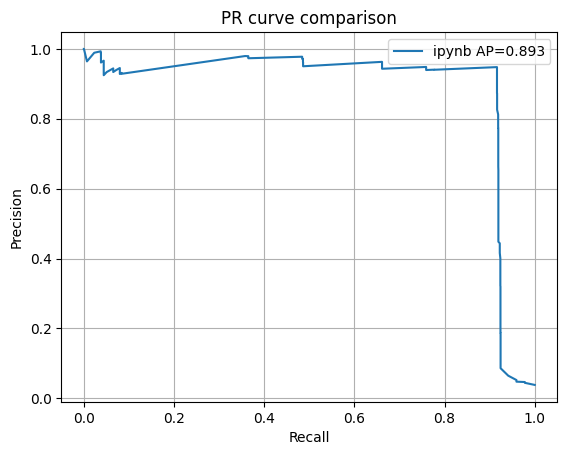

In [35]:
from sklearn.metrics import precision_recall_curve, average_precision_score

scores1 = -isoModel.decision_function(x_valid)     # 左模型
# scores2 = -model.decision_function(df_valid_feat)  # 右模型
# y = y_valid_target

ap1 = average_precision_score(y_valid, scores1)
# ap2 = average_precision_score(y, scores2)

# print(f"AP1={ap1:.4f}, AP2={ap2:.4f}")

import matplotlib.pyplot as plt
prec1, rec1, _ = precision_recall_curve(y_valid, scores1)
# prec2, rec2, _ = precision_recall_curve(y, scores2)
plt.plot(rec1, prec1, label=f'ipynb AP={ap1:.3f}')
# plt.plot(rec2, prec2, label=f'your AP={ap2:.3f}')
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.legend(); plt.grid(True)
plt.title("PR curve comparison")
plt.show()
